In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')



Load the data set

In [5]:
X_train , y_train = load_house_data()
X_features= ['size(sqft)' , 'bedrooms' , 'floors' , 'age']

Scale/normalize the training data

In [9]:
scalar= StandardScaler()
X_norm = scalar.fit_transform(X_train)

Create and fit the regression model

In [10]:
sgdr= SGDRegressor(max_iter=1000)
sgdr.fit(X_norm , y_train)

SGDRegressor()

view parameters

In [11]:
b_norm= sgdr.intercept_
w_norm= sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [110.2  -21.1  -32.52 -38.02], b:[363.16]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


Make Predictions

In [12]:
# make a prediction using sgdr.predict()
y_pred_sgd= sgdr.predict(X_norm)

# make a prediction using w ,b.
y_pred= np.dot(X_norm , w_norm)+ b_norm

print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.21 485.88 389.57 492.04]
Target values 
[300.  509.8 394.  540. ]


Plot results

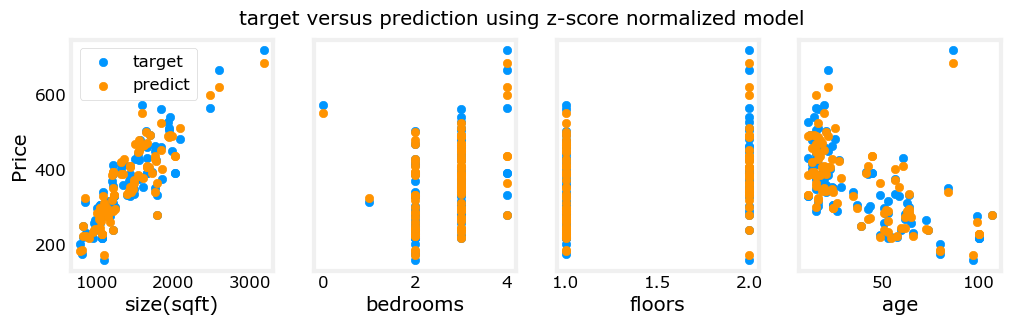

In [15]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()